### Retail Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
data = pd.read_csv('Store_sales_revised.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.shape

(6435, 8)

In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Which store has highest sales?
max_sales = data.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

20

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

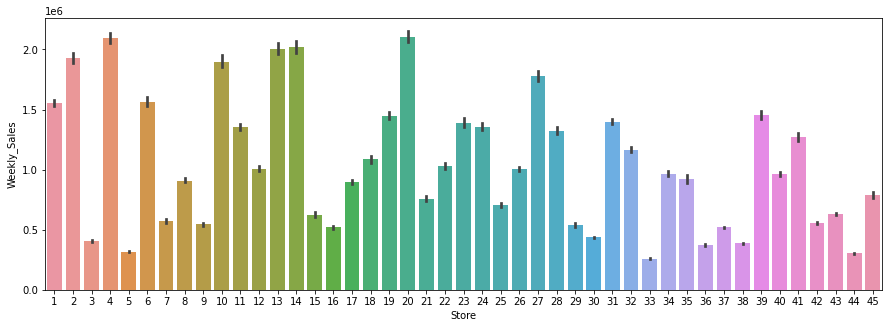

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.Store, y = data.Weekly_Sales)

In [9]:
# Which store Has highest variation in sales - coefficient of mean - max standard deviation
# Maximum Standard deviation
max_std = data.groupby('Store')['Weekly_Sales'].std()
max_std.idxmax()

14

In [10]:
# Maximum coefficient of variation
max_cov = ((data.groupby('Store')['Weekly_Sales'].std())/(data.groupby('Store')['Weekly_Sales'].mean())) * 100
max_cov.idxmax()

35

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

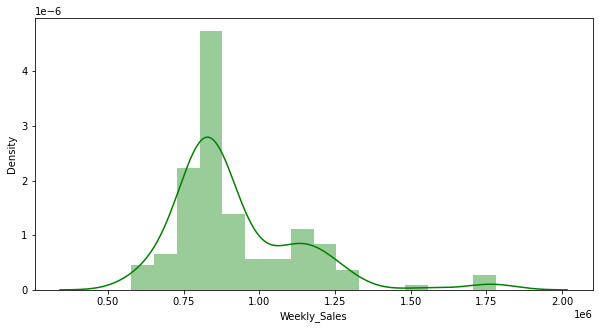

In [11]:
# Plotting the max sales in the Bar chart
stores = data.groupby('Store')
store_35 = stores.get_group(35)
plt.figure(figsize=(10,5))
sns.distplot(store_35.Weekly_Sales, color='green', label='Weekly Sales for Store 35')

C:\Users\santo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

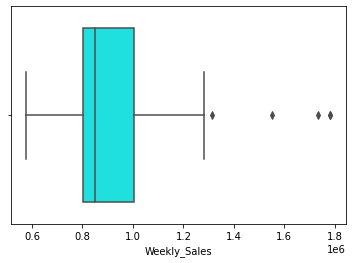

In [12]:
# Identify Outliers in weekly_sales for store 35
sns.boxplot(store_35.Weekly_Sales, color='cyan') #less outliers

In [13]:
# Store 14 has maximum standard deviation and store 35 has maximum coefficient of variance.
# Best to worse third quarterly growth (Q3) rate for 2012 - note dataframe truncated - more dates available 
# but not all could be merged due to different date ranges available in the dataframes available.
# Grouping data by year and month
growth = data.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%m/%d/%Y')
growth['Year'] = growth['Date'].dt.year
growth['Month'] = growth['Date'].dt.month
growth

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [14]:
# Group data with year = 2012
growth_rate = growth.groupby('Year')
growth_rate_2012 = growth_rate.get_group(2012)
growth_rate_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,2


In [15]:
# Getting data for 4 quaters for year 2012
growth_rate_2012_Quaters = growth_rate_2012.groupby('Month')
growth_rate_2012_Q1_1 = growth_rate_2012_Quaters.get_group(1)
growth_rate_2012_Q1_2 = growth_rate_2012_Quaters.get_group(2)
growth_rate_2012_Q1_3 = growth_rate_2012_Quaters.get_group(3)

Quater_1 = growth_rate_2012_Q1_1.append(growth_rate_2012_Q1_2)
Quater_1 = Quater_1.append(growth_rate_2012_Q1_3) #Q1 data of 2012
display(Quater_1.head())  

growth_rate_2012_Q2_4 = growth_rate_2012_Quaters.get_group(4)
growth_rate_2012_Q2_5 = growth_rate_2012_Quaters.get_group(5)
growth_rate_2012_Q2_6 = growth_rate_2012_Quaters.get_group(6)

Quater_2 = growth_rate_2012_Q2_4.append(growth_rate_2012_Q2_5)
Quater_2 = Quater_2.append(growth_rate_2012_Q2_6)  #Q2 data of 2012
display(Quater_2.head())

growth_rate_2012_Q3_7 = growth_rate_2012_Quaters.get_group(7)
growth_rate_2012_Q3_8 = growth_rate_2012_Quaters.get_group(8)
growth_rate_2012_Q3_9 = growth_rate_2012_Quaters.get_group(9)
Quater_3 = growth_rate_2012_Q3_7.append(growth_rate_2012_Q3_8)
Quater_3 = Quater_3.append(growth_rate_2012_Q3_9)  #Q3 data of 2012
display(Quater_3.head())

# Q4 data of 2012
growth_rate_2012_Q4_10 = growth_rate_2012_Quaters.get_group(10)
Quater_4 = growth_rate_2012_Q4_10
display(Quater_4.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
243,2,2012-01-06,1799520.14,0,46.75,3.157,219.355063,7.057,2012,1


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
113,1,2012-04-06,1899676.88,0,70.43,3.891,221.435611,7.143,2012,4
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143,2012,4
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143,2012,4
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143,2012,4
256,2,2012-04-06,2129035.91,0,68.43,3.891,221.073764,6.891,2012,4


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908,2012,7
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7
269,2,2012-07-06,2041507.40,0,84.20,3.227,221.521506,6.565,2012,7


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,2012,10
282,2,2012-10-05,1998321.04,0,70.27,3.617,222.815930,6.170,2012,10


In [16]:
# Grouping the data "Store" wise each Quarter
data2 = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())
data2["Quater1_Sales"] = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())
data2["Quater2_Sales"] = pd.DataFrame(Quater_2.groupby('Store')['Weekly_Sales'].sum())
data2["Quater3_Sales"] = pd.DataFrame(Quater_3.groupby('Store')['Weekly_Sales'].sum())
data2["Quater4_Sales"] = pd.DataFrame(Quater_4.groupby('Store')['Weekly_Sales'].sum())
data2.drop('Weekly_Sales', axis = 1, inplace = True)
data2

,Quater1_Sales,Quater2_Sales,Quater3_Sales,Quater4_Sales
Store,,,,
1,20723762.83,20978760.12,20253947.78,6245587.29
2,24528220.70,25083604.88,24303354.86,7581514.93
3,5421809.72,5620316.49,5298005.47,1684307.82
4,27930310.30,28454363.67,27796792.46,8589722.81
5,4237380.83,4466363.69,4163790.99,1301302.62
6,19467939.96,20833909.92,20167312.24,5845884.88
7,7792647.21,7290859.27,8262787.39,2021262.60
8,11869407.28,11919630.95,11748952.70,3695929.20
9,7209983.86,7484935.11,7022149.56,2256961.05


In [17]:
# Growth rate formula- ((Present value — Past value ) / Past value ) * 100
data2['Q3 - Q2'] = data2['Quater3_Sales'] - data2['Quater2_Sales']
data2['Overall Growth Rate in 2012 Q3 %'] = (data2['Q3 - Q2'] / data2['Quater2_Sales']) * 100
data2['Overall Growth Rate in 2012 Q3 %'].idxmax() # Store which has good growth in Q3-2012

7

<AxesSubplot:xlabel='Store', ylabel='Overall Growth Rate in 2012 Q3 %'>

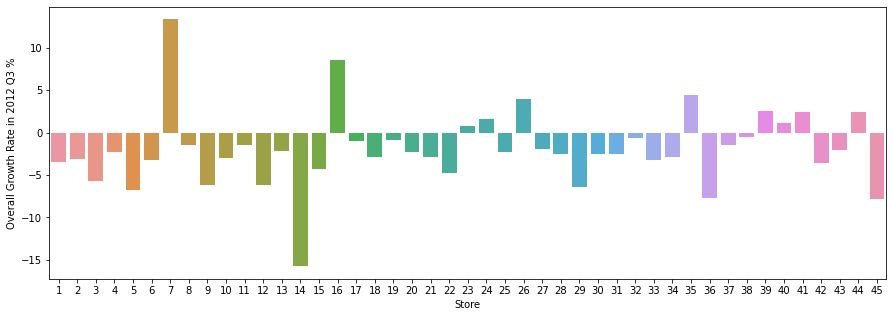

In [18]:
# Plotting the data in Bar chart
plt.figure(figsize=(15,5))
sns.barplot(x = data2.index, y = 'Overall Growth Rate in 2012 Q3 %', data = data2)

In [19]:
# Best growth rate in third quarter (Q3) of 2012: Store 7
# Holiday impact on sales - possible negative correslation - which holidays have higher sales than the mean sales in non-holiday season for all stores grouped.
#finding the mean sales of non holiday and holiday 
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [20]:
# Marking the holiday dates 
data['Date'] = pd.to_datetime(data['Date'])

Christmas1 = pd.Timestamp(2010,12,31)
Christmas2 = pd.Timestamp(2011,12,30)
Christmas3 = pd.Timestamp(2012,12,28)
Christmas4 = pd.Timestamp(2013,12,27)

Thanksgiving1=pd.Timestamp(2010,11,26)
Thanksgiving2=pd.Timestamp(2011,11,25)
Thanksgiving3=pd.Timestamp(2012,11,23)
Thanksgiving4=pd.Timestamp(2013,11,29)

LabourDay1=pd.Timestamp(2010,9,10)
LabourDay2=pd.Timestamp(2011,9,9)
LabourDay3=pd.Timestamp(2012,9,7)
LabourDay4=pd.Timestamp(2013,9,6)

SuperBowl1=pd.Timestamp(2010,2,12)
SuperBowl2=pd.Timestamp(2011,2,11)
SuperBowl3=pd.Timestamp(2012,2,10)
SuperBowl4=pd.Timestamp(2013,2,8)

In [21]:
#Calculating the mean sales during the holidays
Christmas_mean_sales = data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales = data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales = data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]

Christmas_mean_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564
...,...,...,...,...,...,...,...,...
6105,43,2011-12-30,505405.85,1,41.83,3.129,211.074055,10.148
6196,44,2010-12-31,241937.11,1,26.79,2.868,127.087677,7.610
6248,44,2011-12-30,263917.85,1,31.53,3.119,130.071032,6.078
6339,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724


In [22]:
list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(), 2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : round(data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean(),2)}
list_of_mean_sales
# Thanksgiving has much higher sales than non-holiday season. Black Friday deals!
# monthly and semester view of sales in units (semester = 6 months or two quarters)

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1042427.29,
 'SuperBowl_mean_sales': 1079127.99,
 'Non holiday weekly sales': 1041256.38}

Text(0, 0.5, 'Weekly_Sales')

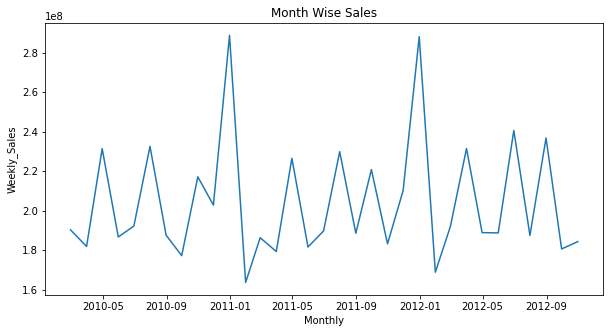

In [23]:
# Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')
# Analysis- highest sum of sales is recorded in between Jan-2011 to March-2011

Text(0, 0.5, 'Weekly_Sales')

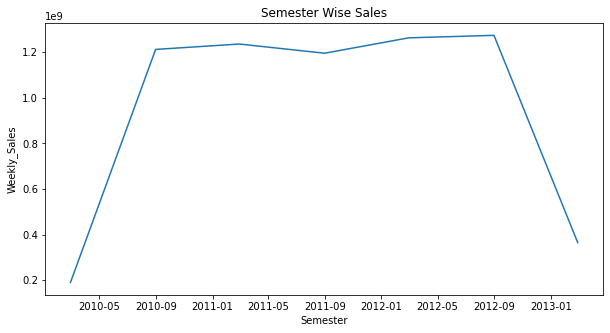

In [24]:
# Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')
# Analysis- sales are lowest in beginning of 1st sem of 2010 and 1st sem of 2013

In [25]:
# For Store 1 – Build prediction models to forecast demand
# Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
# (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales
hypothesis = growth.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = hypothesis.get_group(1) #Filter by Store 1
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()
factors

C:\Users\santo\AppData\Local\Temp/ipykernel_16192/826813737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors['Day'] = day_arr.copy()


,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28
...,...,...,...,...,...,...
138,3.666,6.908,222.981658,1437059.26,0,966
139,3.617,6.573,223.181477,1670785.97,0,973
140,3.601,6.573,223.381296,1573072.81,0,980
141,3.594,6.573,223.425723,1508068.77,0,987


<AxesSubplot:>

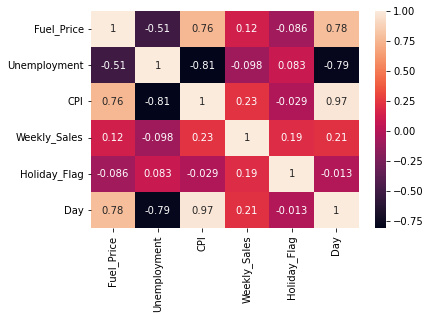

In [26]:
sns.heatmap(factors.corr(), annot = True)
# Few variables which are positive and have value greater than zero are correlated with Weekly_Sales. 
# We can also see CPI and Holiday_Flag is fairly strongly correlated to Weekly_Sales. Holiday_Flag = 1 means it's holiday_week we have sales more than the non_holiday_weeks.

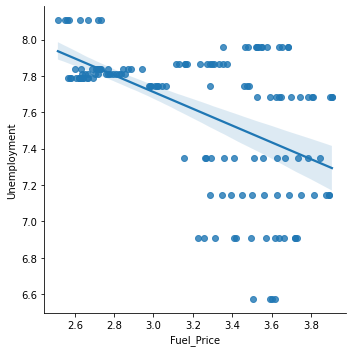

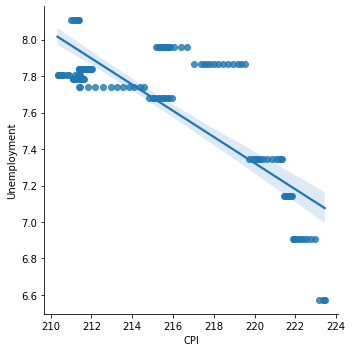

In [27]:
sns.lmplot(x='Fuel_Price', y = 'Unemployment', data = factors)
#plt.figure()
sns.lmplot(x='CPI', y = 'Unemployment', data = factors)
# As the Fuel_price and Cpi goes high, rate of Unemployment Fairly Decreases (shown above in Line Regression plot)

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.106725927640744e-144
reject null hypothesis


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

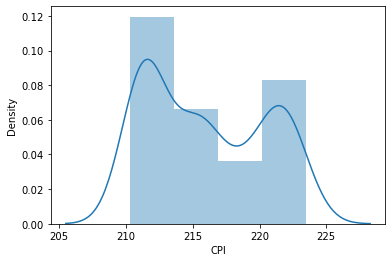

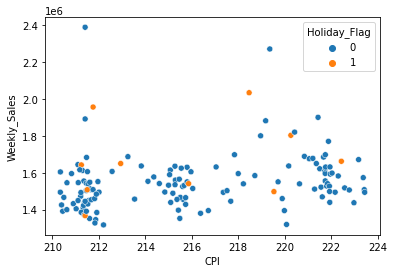

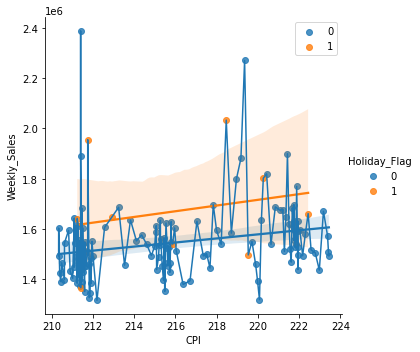

In [28]:
# Hypothesis Testing - CPI
ttest, pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

# 1) Earlier, we rejected the null hypothesis saying that ther is no relationship between Weekly_sales and CPI. 
# But we found there is a positive corrlation between CPI and Weekly_sales as shown in the above graphs.
# 2) The CPI is not normally distributed and line regression plot is showing how CPI is varying with Weekly_Sales 
# on days of Holidays and non holiday weeks.

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.050079726743709e-144
reject null hypothesis


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

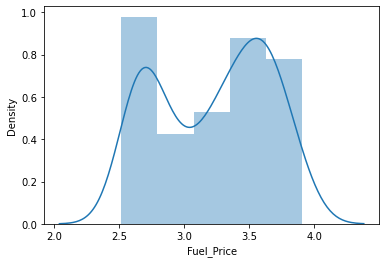

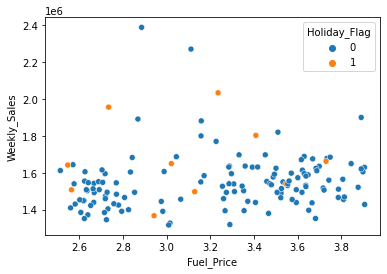

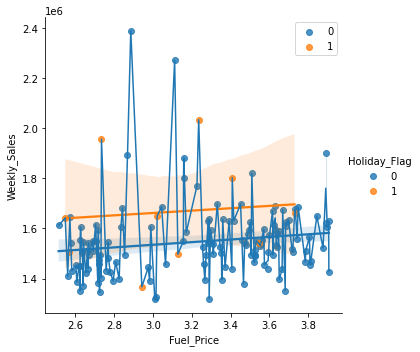

In [29]:
# Hypothesis Testing - Fuel_Price
ttest, pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

# There are more number of Sales when the Fuel_Price are higher and also we can see more Sales during Holiday_Weeks 
# when fuel_prices were fairly low. So its not clear to say on what factors Fuel_price has a direct dependency on Sales.

C:\Users\santo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.0515405336011733e-144
reject null hypothesis


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

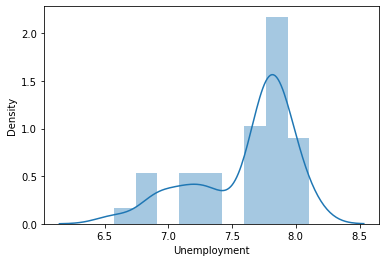

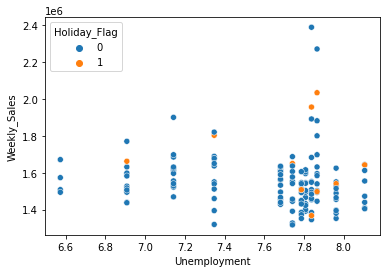

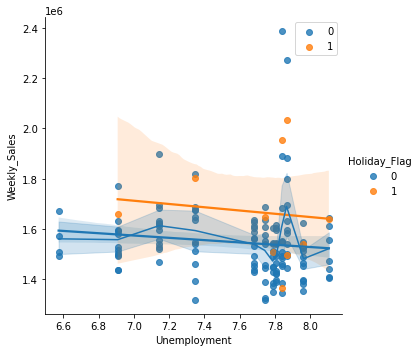

In [30]:
# Hypothesis Testing - Unemployment
ttest, pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
#plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

# Purchases increase only during the holidays as the rate of unemployment increase with few outliers present for weekly-sales. 
# People limit their purchases as unemployment rises and thus help justify the rejecting the null hypothesis.

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

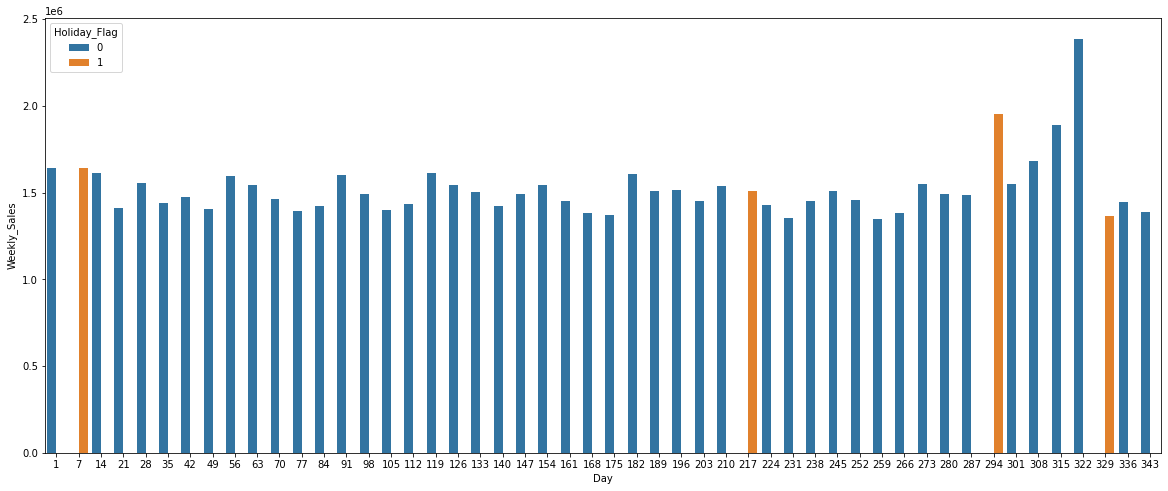

In [31]:
# Plotting the Weekly_sales for store 1 (Day wise)
plt.figure(figsize=(20, 8))
sns.barplot(x='Day', y = 'Weekly_Sales', data = factors.head(50), hue = 'Holiday_Flag')

# Store 1 sales increase during the holidays.